# Multilinear Regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

## Read clean dataset

In [2]:
df = pd.read_csv('clean.csv')
df.head()

,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,arr_time_Afternoon,arr_time_Evening,arr_time_Morning,arr_time_Night,...,dep_time_Morning,dep_time_Night,airline_Air India,airline_Vistara,time_taken,stop,price,distance,dia,mes
0,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,2.000000,0,25612,1146.935458,11,2
1,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,2.250000,0,25612,1146.935458,11,2
2,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,24.750000,1,42220,1146.935458,11,2
3,0,0,0,0,0,1,0,0,0,1,...,0,1,1,0,26.500000,1,44450,1146.935458,11,2
4,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,6.666667,1,46690,1146.935458,11,2


## Normalize data

In [3]:
target_scaler = preprocessing.MinMaxScaler()
target_scaler.fit_transform(df['price'].values.reshape(-1, 1))

array([[0.05160057],
       [0.05160057],
       [0.325222  ],
       ...,
       [0.93281381],
       [0.97377136],
       [0.97377136]])

In [4]:
scaler = preprocessing.MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,arr_time_Afternoon,arr_time_Evening,arr_time_Morning,arr_time_Night,...,dep_time_Morning,dep_time_Night,airline_Air India,airline_Vistara,time_taken,stop,price,distance,dia,mes
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.012590,0.0,0.051601,0.587407,0.333333,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.017986,0.0,0.051601,0.587407,0.333333,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.503597,0.5,0.325222,0.587407,0.333333,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.541367,0.5,0.361962,0.587407,0.333333,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.113309,0.5,0.398867,0.587407,0.333333,0.0


## Split dataset into training and testing subsets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='price'), df['price'], test_size=0.3, random_state=0)

## Fit the LinearRegression model

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predict using the trained model

In [7]:
y_pred = model.predict(X_test)
y_pred

array([0.56542969, 0.58105469, 0.52636719, ..., 0.55664062, 0.50683594,
       0.54003906])


## Scale back the data

In [8]:
scaled_back_pred = target_scaler.inverse_transform(y_pred.reshape(-1, 1))
scaled_back_test = target_scaler.inverse_transform(y_test.values.reshape(-1, 1))

## Assess the performance of the model

In [26]:

print( 
  'mean_squared_error : ', mean_squared_error(y_test, y_pred)) 
print( 
  ' mean_absolute_error : ', mean_absolute_error(y_test, y_pred))

print(
  'mean_absolute_percentage_error : ', np.mean(np.abs((y_test - np.array(y_pred)) / y_test)) * 100)

mean_squared_error :  0.018404105304946357
 mean_absolute_error :  0.10619039651408696
mean_absolute_percentage_error :  34.22378167439478


In [10]:
# compare test and prediction (normalized data)
for test, pred in zip(y_test, y_pred):
    print(f"Predicted: {pred} \t Original: {test}\n")

Predicted: 0.5654296875 	 Original: 0.6291414732194343

Predicted: 0.5810546875 	 Original: 0.4180766759477404

Predicted: 0.5263671875 	 Original: 0.33018106331449654

Predicted: 0.572265625 	 Original: 0.6169827174324924

Predicted: 0.6064453125 	 Original: 0.7704499398652322

Predicted: 0.2353515625 	 Original: 0.1182266009852217

Predicted: 0.6015625 	 Original: 0.6246766726526847

Predicted: 0.67578125 	 Original: 0.660839909715472

Predicted: 0.5478515625 	 Original: 0.35916107880125875

Predicted: 0.4619140625 	 Original: 0.36354350297378785

Predicted: 0.65625 	 Original: 0.4910786365059228

Predicted: 0.4873046875 	 Original: 0.561938810814373

Predicted: 0.6494140625 	 Original: 0.9014613572334711

Predicted: 0.25 	 Original: 0.23447616850915204

Predicted: 0.1904296875 	 Original: 0.23447616850915204

Predicted: 0.505859375 	 Original: 0.561938810814373

Predicted: 0.4345703125 	 Original: 0.6105244081256076

Predicted: 0.5439453125 	 Original: 0.3095540142016903

Predicted:

In [11]:
print(y_pred-y_test)

68038   -0.063712
2950     0.162978
38776    0.196186
10354   -0.044717
42089   -0.164005
           ...   
40524   -0.257907
78390    0.016976
5143     0.024539
48585    0.251387
70623   -0.023778
Name: price, Length: 26952, dtype: float64


In [22]:
print( 
  'mean_squared_error : ', mean_squared_error(scaled_back_test.flatten(), scaled_back_pred.flatten())) 
print( 
  'mean_absolute_error : ', mean_absolute_error(scaled_back_test.flatten(), scaled_back_pred.flatten()))


mean_squared_error :  67803039.34550668
mean_absolute_error :  6445.438497215536


In [13]:
for test, pred in zip(scaled_back_test.flatten(), scaled_back_pred.flatten()):
    print(f"Predicted: {pred:.2f} \t Original: {test:.2f}")

Predicted: 56799.89 	 Original: 60667.00
Predicted: 57748.28 	 Original: 47856.00
Predicted: 54428.91 	 Original: 42521.00
Predicted: 57214.81 	 Original: 59929.00
Predicted: 59289.41 	 Original: 69244.00
Predicted: 36765.13 	 Original: 29656.00
Predicted: 58993.04 	 Original: 60396.00
Predicted: 63497.89 	 Original: 62591.00
Predicted: 55732.95 	 Original: 44280.00
Predicted: 50516.80 	 Original: 44546.00
Predicted: 62312.41 	 Original: 52287.00
Predicted: 52057.93 	 Original: 56588.00
Predicted: 61897.49 	 Original: 77196.00
Predicted: 37654.25 	 Original: 36712.00
Predicted: 34038.51 	 Original: 36712.00
Predicted: 53184.15 	 Original: 56588.00
Predicted: 48857.11 	 Original: 59537.00
Predicted: 55495.85 	 Original: 41269.00
Predicted: 54428.91 	 Original: 60232.00
Predicted: 53954.71 	 Original: 36980.00
Predicted: 48264.37 	 Original: 45883.00
Predicted: 54962.38 	 Original: 57920.00
Predicted: 55140.20 	 Original: 83087.00
Predicted: 51228.09 	 Original: 54608.00
Predicted: 78731

In [14]:
print(scaled_back_pred.flatten() - scaled_back_test.flatten())

[-3867.11425781  9892.27636719 11907.90917969 ...  1489.41601563
 15258.42089844 -1443.24902344]


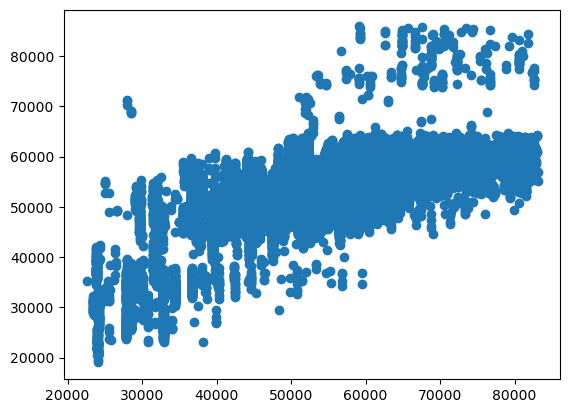

In [15]:
import matplotlib.pyplot as plt
plt.scatter(scaled_back_test.flatten(), scaled_back_pred.flatten())

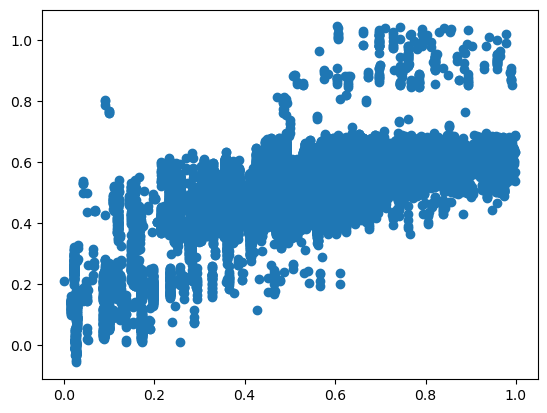

In [16]:
plt.scatter(y_test, y_pred)